Work with the deepstack object detection API (Yolo-v3). Note that by default, the minimum confidence for detected objects is 0.45

In [1]:
!pip install deepstack-python

  Created wheel for deepstack-python: filename=deepstack_python-0.4-py3-none-any.whl size=4482 sha256=ebf23d1570a94517894ae6e0c7314465eb2b428e7e5201960505d5c5f8698844
  Stored in directory: /home/jovyan/.cache/pip/wheels/6f/f3/f0/7fa3e9cca2035df00ab286898ac7f8fc109b3bf02b19e2d280
Successfully built deepstack-python


In [2]:
import deepstack.core as ds
from PIL import Image
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#IP_ADDRESS = 'localhost'
IP_ADDRESS = '192.168.1.133'
PORT = '5000'
API_KEY = "mysecretkey"
TIMEOUT = 30 # Default is 10

In [13]:
ls

README.md        usage-face-recognition.ipynb
test-image3.jpg  usage-object-detection.ipynb


## Object detection

In [14]:
dsobject = ds.DeepstackObject(IP_ADDRESS, PORT, API_KEY, TIMEOUT)

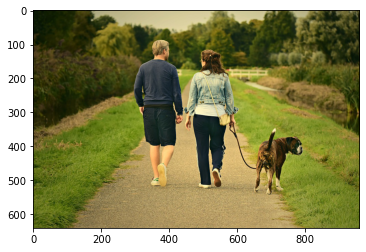

In [28]:
image_path = 'test-image3.jpg'

plt.imshow(Image.open(image_path));

In [30]:
image_width, image_height = Image.open(image_path).size
print(image_width)
print(image_height)

960
640


Perform object detection - can be slow

In [16]:
%%time
try:
    with open(image_path, 'rb') as image_bytes:
        dsobject.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 7.63 ms, sys: 7.14 ms, total: 14.8 ms
Wall time: 7.2 s


Access the predictions

In [17]:
predictions = dsobject.predictions
predictions

[{'confidence': 0.9995428,
  'label': 'person',
  'y_min': 95,
  'x_min': 295,
  'y_max': 523,
  'x_max': 451},
 {'confidence': 0.9994912,
  'label': 'person',
  'y_min': 99,
  'x_min': 440,
  'y_max': 531,
  'x_max': 608},
 {'confidence': 0.9990447,
  'label': 'dog',
  'y_min': 358,
  'x_min': 647,
  'y_max': 539,
  'x_max': 797}]

In [18]:
len(predictions)

3

## Helper functions
The package provides helper functions for extracting info out of deepstack predictions

Get the set objects

In [19]:
ds.get_objects(predictions)

['dog', 'person']

Get a summary of the number of occurances of objects

In [20]:
summary = ds.get_objects_summary(predictions)
summary

{'dog': 1, 'person': 2}

Get a list of confidences for a single object type, e.g. `person`

In [21]:
person_confidences = ds.get_object_confidences(predictions, 'person')
person_confidences

[0.9995428, 0.9994912]

Get the list of confidences above some threshold value, useful for counting

In [23]:
CONFIDENCE_THRESHOLD = 0.9
len(ds.get_confidences_above_threshold(person_confidences, CONFIDENCE_THRESHOLD))

2

## Format data

In [40]:
def get_objects(predictions: list, img_width: int, img_height: int):
    """Return objects with formatting and extra info."""
    objects = []
    decimal_places = 3
    for pred in predictions:
        box_width = pred["x_max"] - pred["x_min"]
        box_height = pred["y_max"] - pred["y_min"]
        box = {
            "height": round(box_height / img_height, decimal_places),
            "width": round(box_width / img_width, decimal_places),
            "y_min": round(pred["y_min"] / img_height, decimal_places),
            "x_min": round(pred["x_min"] / img_width, decimal_places),
            "y_max": round(pred["y_max"] / img_height, decimal_places),
            "x_max": round(pred["x_max"] / img_width, decimal_places),
        }
        box_area = round(box["height"] * box["width"], decimal_places)
        centroid = {
            "x": round(box["x_min"] + (box["width"] / 2), decimal_places),
            "y": round(box["y_min"] + (box["height"] / 2), decimal_places),
        }
        name = pred["label"]
        confidence = round(pred["confidence"] * 100, decimal_places)

        objects.append(
            {
                "bounding_box": box,
                "box_area": box_area,
                "centroid": centroid,
                "name": name,
                "confidence": confidence,
            }
        )
    return objects

In [41]:
get_objects(predictions, image_width, image_height)

[{'bounding_box': {'height': 0.669,
   'width': 0.163,
   'y_min': 0.148,
   'x_min': 0.307,
   'y_max': 0.817,
   'x_max': 0.47},
  'box_area': 0.109,
  'centroid': {'x': 0.389, 'y': 0.483},
  'name': 'person',
  'confidence': 99.954},
 {'bounding_box': {'height': 0.675,
   'width': 0.175,
   'y_min': 0.155,
   'x_min': 0.458,
   'y_max': 0.83,
   'x_max': 0.633},
  'box_area': 0.118,
  'centroid': {'x': 0.545, 'y': 0.493},
  'name': 'person',
  'confidence': 99.949},
 {'bounding_box': {'height': 0.283,
   'width': 0.156,
   'y_min': 0.559,
   'x_min': 0.674,
   'y_max': 0.842,
   'x_max': 0.83},
  'box_area': 0.044,
  'centroid': {'x': 0.752, 'y': 0.701},
  'name': 'dog',
  'confidence': 99.904}]

In [45]:
test = {'a':1, 'b':2, 'c':3}

In [46]:
tuple(test.values())

(1, 2, 3)